In [2]:
import pandas as pd

In [3]:
Data=pd.read_csv('train.csv').drop(['id'],axis=1)

In [4]:
import seaborn as sns

<Axes: >

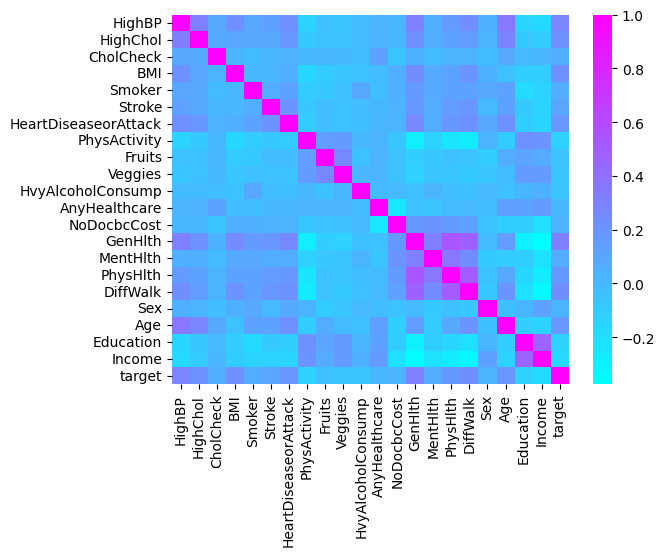

In [5]:
sns.heatmap(Data.corr(),cmap='cool')


In [6]:
print(len(Data))

300000


In [7]:
from imblearn.over_sampling import SMOTE
Data0=Data
x=Data.drop(['target'],axis=1)    #特征
y=Data['target']    #标签
 
groupby_data_o=Data.groupby(['target'])['target'].count()   #标签类别分类计数
groupby_data_o 
model_smote=SMOTE()
x_smote_resampled,y_smote_resampled=model_smote.fit_resample(x,y)  #输入数据进行过抽样处理
y_smote_resampled=pd.DataFrame(y_smote_resampled,columns=['target'])
 
smote_resampled=pd.concat([x_smote_resampled,y_smote_resampled],axis=1)  #将特征和标签重新拼接
Data=smote_resampled
group_data_smote=smote_resampled.groupby(['target'])['target'].count()   #查看标签类别个数
print(len(Data))
print(group_data_smote)

756000
target
0.0    252000
1.0    252000
2.0    252000
Name: target, dtype: int64


In [8]:
from xgboost import XGBClassifier



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Data=Data.sample(frac=1.0)
X_train, X_test, y_train, y_test = train_test_split(Data.drop(['target'],axis=1), Data['target'], test_size=0.5, random_state=43643)
X_train0, X_test0, y_train0, y_test0 = train_test_split(Data0.drop(['target'],axis=1), Data0['target'], test_size=0.5, random_state=43643)
Model1=RandomForestClassifier(n_estimators=48)
Model1.fit(X_train,y_train)
model = XGBClassifier(learning_rate=0.01,
                      n_estimators=24,           # 树的个数-10棵树建立xgboost
                    #   max_depth=4,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.02,                  # 惩罚项中叶子结点个数前的参数
                      # subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27,           # 随机数
                      slient = 0
                      )
model.fit(X_train0,y_train0)

[10:39:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_btree=1,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.02, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=24, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
Model2=GradientBoostingClassifier(n_estimators=24)
Model2.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=24)

In [11]:
from sklearn.metrics import f1_score
print(f1_score(Model1.predict(X_test),y_test,average='macro'))
print(f1_score(Model2.predict(X_test),y_test,average='macro'))
print(f1_score(model.predict(X_test0),y_test0,average='macro'))

0.8540924398910704
0.6440591977346996
0.38537058163622423


In [12]:
Data_test=pd.read_csv('test.csv').drop(['id'],axis=1)
REs1=pd.DataFrame(Model1.predict(Data_test))
REs1.to_csv('2.csv')